In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import pickle

df = pd.read_csv("books.csv")

In [2]:
df.duplicated().sum()  # find the duplicated values

0

In [3]:
df.isnull().sum()  # the number of null columns

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11127
dtype: int64

In [4]:
df.drop(columns=["Unnamed: 12"], inplace=True)  # Drop the null column

In [5]:
df.replace(
    to_replace="J.K. Rowling/Mary GrandPré", value="J.K. Rowling", inplace=True
)  # Replace the name with one author

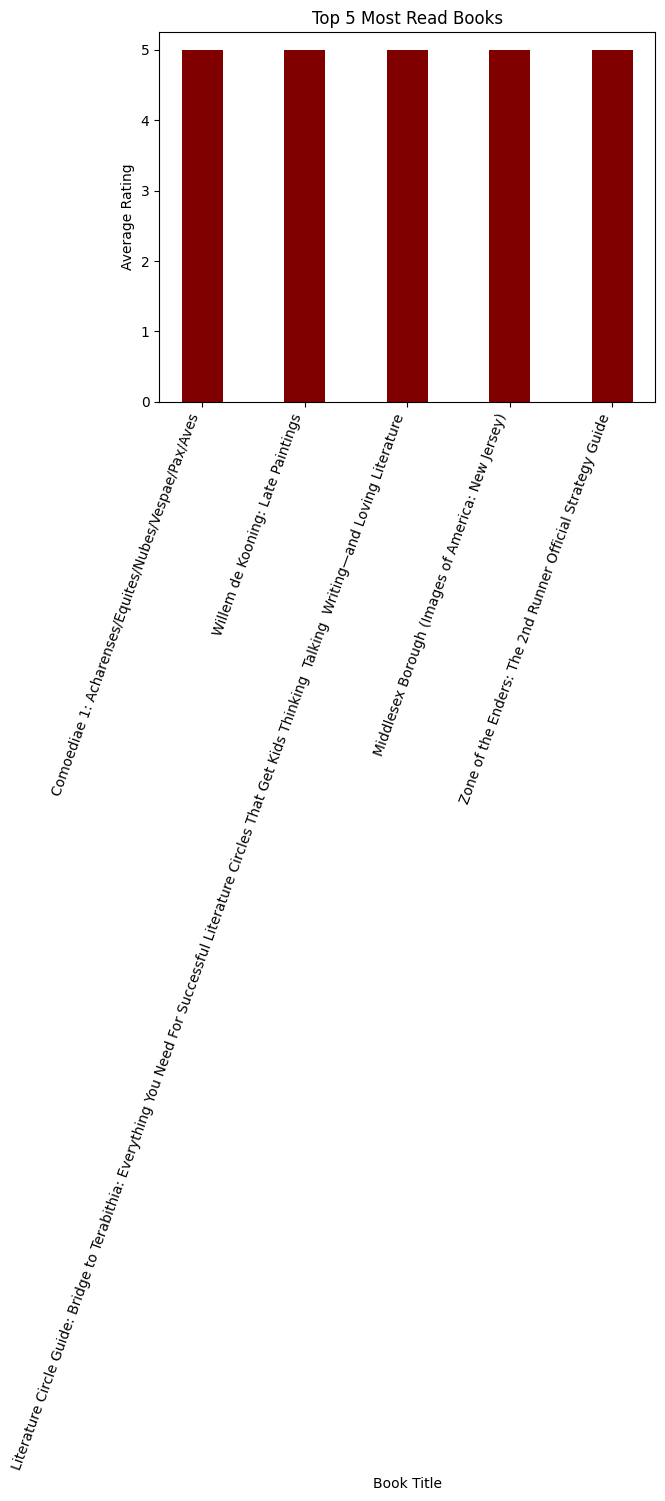

In [6]:
# Selecting the top 5 books based on their average ratings from the DataFrame 'df'
top_books = df.nlargest(5, "average_rating")

# Creating a bar plot for the top books
plt.bar(top_books["title"], top_books["average_rating"], color="maroon", width=0.4)

# Adding labels to the x and y axes
plt.xlabel("Book Title")
plt.ylabel("Average Rating")

# Adding a title to the plot
plt.title("Top 5 Most Read Books")

# Rotating x-axis labels for better readability
plt.xticks(rotation=70, ha="right")

# Displaying the plot
plt.show()

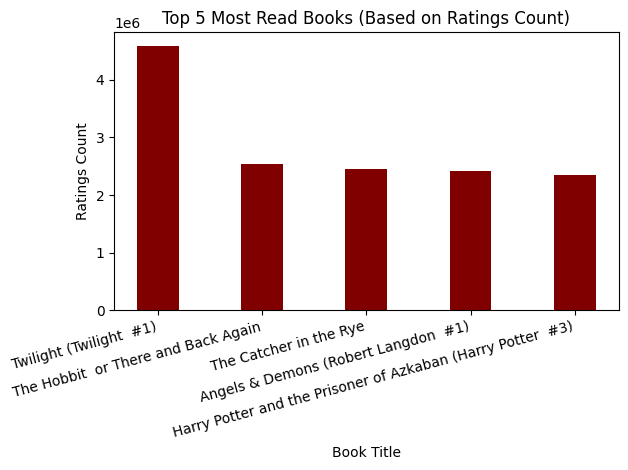

In [7]:
# Selecting the top 5 books based on their ratings count from the DataFrame 'df'
top_books = df.nlargest(5, "ratings_count")

# Creating a bar plot for the top books based on ratings count
plt.bar(top_books["title"], top_books["ratings_count"], color="maroon", width=0.4)

# Adding labels to the x and y axes
plt.xlabel("Book Title")
plt.ylabel("Ratings Count")

# Adding a title to the plot
plt.title("Top 5 Most Read Books (Based on Ratings Count)")

# Rotating x-axis labels for better readability
plt.xticks(rotation=15, ha="right")

# Adjusting layout for better appearance
plt.tight_layout()

# Displaying the plot
plt.show()

In [8]:
# feature engineering
text_reviews_count = df["text_reviews_count"]
ratings_count = df["ratings_count"]
average_rating = df["average_rating"]

# Calculating the total ratings count across all books
total_ratings_count = np.sum(ratings_count)

# Calculating the weighted average based on ratings count, text reviews count, and average rating
df["weighted_average"] = (
    average_rating * ratings_count * text_reviews_count
) / total_ratings_count

In [9]:
df.columns = df.columns.str.lstrip()

In [10]:
# Creating a new DataFrame 'new_df' with selected columns from the original DataFrame 'df'
new_df = df[
    [
        "title",
        "weighted_average",
        "authors",
        "isbn",
        "language_code",
        "num_pages",
        "publication_date",
        "publisher",
    ]
]

In [11]:
# Counting the number of duplicated values in the 'authors' column of the DataFrame 'df'
duplicated_authors_count = new_df["authors"].duplicated().sum()
duplicated_authors_count

4485

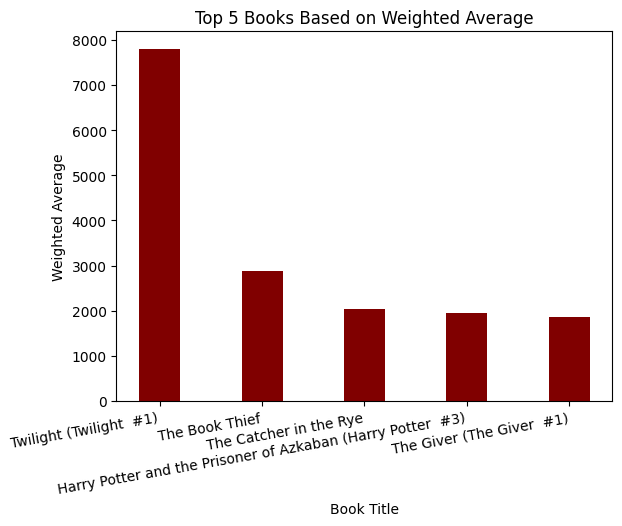

In [12]:
# Selecting the top 5 books based on their weighted average from the DataFrame 'df'
top_books = new_df.nlargest(5, "weighted_average")

# Creating a bar plot for the top books based on their weighted average
plt.bar(top_books["title"], top_books["weighted_average"], color="maroon", width=0.4)

# Adding labels to the x and y axes
plt.xlabel("Book Title")
plt.ylabel("Weighted Average")

# Adding a title to the plot
plt.title("Top 5 Books Based on Weighted Average")

# Rotating x-axis labels for better readability
plt.xticks(rotation=10, ha="right")

# Displaying the plot
plt.show()

In [13]:
# Create bins and labels for num_pages segmentation
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float("inf")]
labels = [
    "0-100",
    "100-200",
    "200-300",
    "300-400",
    "400-500",
    "500-600",
    "600-700",
    "700-800",
    "800-900",
    "900-1000",
    "1000+",
]

# Use the cut() function to assign values to bins and create a new column 'num_pages_range'
new_df["num_pages_range"] = pd.cut(
    df["num_pages"], bins=bins, labels=labels, right=False
)

# Print the updated DataFrame
print(new_df)

                                                   title  weighted_average  \
0      Harry Potter and the Half-Blood Prince (Harry ...       1324.027768   
1      Harry Potter and the Order of the Phoenix (Har...       1415.485880   
2      Harry Potter and the Chamber of Secrets (Harry...          0.034222   
3      Harry Potter and the Prisoner of Azkaban (Harr...       1941.760691   
4      Harry Potter Boxed Set  Books 1-5 (Harry Potte...          0.162724   
...                                                  ...               ...   
11122   Expelled from Eden: A William T. Vollmann Reader          0.000063   
11123                        You Bright and Risen Angels          0.000896   
11124                    The Ice-Shirt (Seven Dreams #1)          0.001546   
11125                                        Poor People          0.001992   
11126                        Las aventuras de Tom Sawyer          0.000027   

                                                 authors       

/var/folders/f2/d3zb7g417sgdklvf0bbv8jzm0000gn/T/ipykernel_81777/21718021.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["num_pages_range"] = pd.cut(


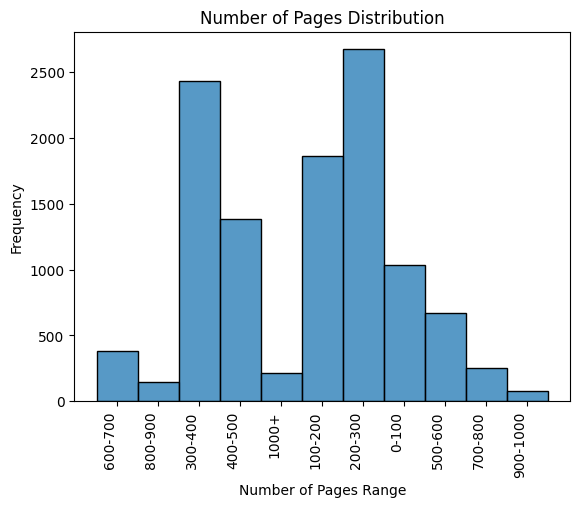

In [14]:
# Plot a histogram of the 'num_pages_range' segment
sns.histplot(new_df["num_pages_range"].astype("str"))
plt.xticks(rotation=90, ha="right")


plt.title("Number of Pages Distribution")
plt.xlabel("Number of Pages Range")
plt.ylabel("Frequency")
plt.show()

0        average_rating_5
1        average_rating_5
2        average_rating_5
3        average_rating_5
4        average_rating_5
               ...       
11122    average_rating_5
11123    average_rating_5
11124    average_rating_4
11125    average_rating_4
11126    average_rating_4
Name: average_rating, Length: 11127, dtype: category
Categories (5, object): ['average_rating_1' < 'average_rating_2' < 'average_rating_3' < 'average_rating_4' < 'average_rating_5']


/var/folders/f2/d3zb7g417sgdklvf0bbv8jzm0000gn/T/ipykernel_81777/3274845621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["average_rating_segment"] = average_rating_segment


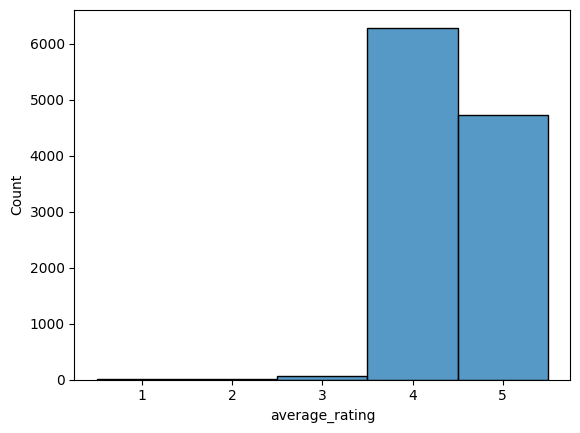

In [15]:
average_rating_segment = pd.cut(
    df.average_rating, [0, 1, 2, 3, 4, 5], labels=["1", "2", "3", "4", "5"]
)
print(average_rating_segment.apply(lambda x: "average_rating_" + x))
sns.histplot(average_rating_segment)
new_df["average_rating_segment"] = average_rating_segment
plt.show()

In [16]:
new_df.head()

,title,weighted_average,authors,isbn,language_code,num_pages,publication_date,publisher,num_pages_range,average_rating_segment
0,Harry Potter and the Half-Blood Prince (Harry ...,1324.027768,J.K. Rowling,439785960,eng,652,9/16/2006,Scholastic Inc.,600-700,5
1,Harry Potter and the Order of the Phoenix (Har...,1415.485880,J.K. Rowling,439358078,eng,870,9/1/2004,Scholastic Inc.,800-900,5
2,Harry Potter and the Chamber of Secrets (Harry...,0.034222,J.K. Rowling,439554896,eng,352,11/1/2003,Scholastic,300-400,5
3,Harry Potter and the Prisoner of Azkaban (Harr...,1941.760691,J.K. Rowling,043965548X,eng,435,5/1/2004,Scholastic Inc.,400-500,5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,0.162724,J.K. Rowling,439682584,eng,2690,9/13/2004,Scholastic,1000+,5


In [17]:
new_df["average_rating_segment"].max()

'5'

In [18]:
# Assuming 'final_df' has the 'publication_date' column
date_str = new_df["publication_date"]

# Split the date string into parts using '/'
date_parts = date_str.apply(lambda x: x.split("/"))

# Extract the last part of the date string as the year and assign it to a new column 'year' in 'df'
new_df["year"] = date_parts.apply(lambda x: x[-1])

# Print or visualize the updated 'df'
print(new_df[["publication_date", "year"]])

      publication_date  year
0            9/16/2006  2006
1             9/1/2004  2004
2            11/1/2003  2003
3             5/1/2004  2004
4            9/13/2004  2004
...                ...   ...
11122       12/21/2004  2004
11123        12/1/1988  1988
11124         8/1/1993  1993
11125        2/27/2007  2007
11126        5/28/2006  2006

[11127 rows x 2 columns]


/var/folders/f2/d3zb7g417sgdklvf0bbv8jzm0000gn/T/ipykernel_81777/2057995641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["year"] = date_parts.apply(lambda x: x[-1])


In [19]:
new_df.head()

,title,weighted_average,authors,isbn,language_code,num_pages,publication_date,publisher,num_pages_range,average_rating_segment,year
0,Harry Potter and the Half-Blood Prince (Harry ...,1324.027768,J.K. Rowling,439785960,eng,652,9/16/2006,Scholastic Inc.,600-700,5,2006
1,Harry Potter and the Order of the Phoenix (Har...,1415.485880,J.K. Rowling,439358078,eng,870,9/1/2004,Scholastic Inc.,800-900,5,2004
2,Harry Potter and the Chamber of Secrets (Harry...,0.034222,J.K. Rowling,439554896,eng,352,11/1/2003,Scholastic,300-400,5,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,1941.760691,J.K. Rowling,043965548X,eng,435,5/1/2004,Scholastic Inc.,400-500,5,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,0.162724,J.K. Rowling,439682584,eng,2690,9/13/2004,Scholastic,1000+,5,2004


In [20]:
pd.set_option("display.width", 1000)


def textToTags(title):
    cleanup = re.sub("[\d|\W]", " ", title.lower())
    words = cleanup.split(" ")
    final = set(words)
    final.discard("")
    return final


new_df["title"].apply(textToTags)
new_df["authors"].apply(textToTags)

0                                          {k, rowling, j}
1                                          {k, rowling, j}
2                                          {k, rowling, j}
3                                          {k, rowling, j}
4                                          {k, rowling, j}
                               ...                        
11122    {michael, vollmann, hemmingson, mccaffery, t, ...
11123                               {vollmann, william, t}
11124                               {vollmann, william, t}
11125                               {vollmann, william, t}
11126                                        {mark, twain}
Name: authors, Length: 11127, dtype: object

In [21]:
# Assuming 'new_df' already exists and you want to create the 'num_page_range_segment' column
new_df["num_page_range_segment"] = pd.qcut(
    new_df["num_pages"],
    [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=["xs", "s", "m", "l", "xl"],
)


# Define the textToTags function
def textToTags(text):
    cleanup = re.sub("[\d|\W]", " ", str(text).lower())
    words = cleanup.split()
    final = set(words)
    final.discard("")
    return final


# Create the 'tags' column
new_df["tags"] = (
    new_df["title"]
    + new_df["authors"]
    + new_df["average_rating_segment"].astype("str")
    + new_df["language_code"]
    + new_df["num_page_range_segment"].astype("str")
    + new_df["year"].astype("str")
    + new_df["publisher"]
).apply(textToTags)

# Print or visualize the updated 'new_df' with the 'tags' column
print(
    new_df[
        [
            "title",
            "authors",
            "average_rating_segment",
            "language_code",
            "num_page_range_segment",
            "year",
            "publisher",
            "tags",
        ]
    ]
)

/var/folders/f2/d3zb7g417sgdklvf0bbv8jzm0000gn/T/ipykernel_81777/1451321197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["num_page_range_segment"] = pd.qcut(


                                                   title                                            authors average_rating_segment language_code num_page_range_segment  year        publisher                                               tags
0      Harry Potter and the Half-Blood Prince (Harry ...                                       J.K. Rowling                      5           eng                     xl  2006  Scholastic Inc.  {the, harry, blood, and, k, engxl, inc, prince...
1      Harry Potter and the Order of the Phoenix (Har...                                       J.K. Rowling                      5           eng                     xl  2004  Scholastic Inc.  {scholastic, the, harry, k, and, engxl, inc, o...
2      Harry Potter and the Chamber of Secrets (Harry...                                       J.K. Rowling                      5           eng                      l  2003       Scholastic  {scholastic, chamber, the, harry, k, and, secr...
3      Harry Potter and the Pris

In [22]:
new_df["tags"] = (
    new_df["title"]
    + new_df["authors"]
    + new_df["average_rating_segment"].astype("str")
    + new_df["language_code"]
    + new_df["num_page_range_segment"].astype("str")
    + new_df["year"]
    + new_df["publisher"]
).apply(textToTags)

In [23]:
final_df = new_df[["isbn", "tags", "title"]]
final_df

,isbn,tags,title
0,439785960,"{the, harry, blood, and, k, engxl, inc, prince...",Harry Potter and the Half-Blood Prince (Harry ...
1,439358078,"{scholastic, the, harry, k, and, engxl, inc, o...",Harry Potter and the Order of the Phoenix (Har...
2,439554896,"{scholastic, chamber, the, harry, k, and, secr...",Harry Potter and the Chamber of Secrets (Harry...
3,043965548X,"{scholastic, azkaban, the, harry, prisoner, an...",Harry Potter and the Prisoner of Azkaban (Harr...
4,439682584,"{set, harry, k, engxl, boxed, j, scholastic, r...",Harry Potter Boxed Set Books 1-5 (Harry Potte...
...,...,...,...
11122,1560254416,"{press, michael, vollmann, hemmingson, expelle...",Expelled from Eden: A William T. Vollmann Reader
11123,140110879,"{penguin, risen, vollmann, and, engxl, angelsw...",You Bright and Risen Angels
11124,140131965,"{shirt, penguin, the, vollmann, dreams, engl, ...",The Ice-Shirt (Seven Dreams #1)
11125,60878827,"{vollmann, peoplewilliam, engl, t, poor, ecco}",Poor People


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming final_df['tags'] contains sets of tags for each item
tag_sets = final_df["tags"]

# Convert sets to strings
tag_list = [" ".join(tag_set) for tag_set in tag_sets]

# Create a CountVectorizer instance
cv = CountVectorizer()

# Fit and transform the tag_list to create vectors
vectors = cv.fit_transform(tag_list).toarray()

# Calculate cosine similarity
similarity = cosine_similarity(vectors)

# Print the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity)

Cosine Similarity Matrix:
[[1.         0.72727273 0.57207755 ... 0.09534626 0.         0.        ]
 [0.72727273 1.         0.66742381 ... 0.09534626 0.         0.        ]
 [0.57207755 0.66742381 1.         ... 0.2        0.14142136 0.        ]
 ...
 [0.09534626 0.09534626 0.2        ... 1.         0.28284271 0.        ]
 [0.         0.         0.14142136 ... 0.28284271 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [25]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])[1:10]

[(615, 0.8181818181818183),
 (1, 0.7272727272727274),
 (3, 0.6363636363636365),
 (6, 0.6154574548966638),
 (2, 0.5720775535473555),
 (10679, 0.5720775535473555),
 (4416, 0.5640760748177661),
 (1233, 0.5454545454545455),
 (4, 0.533001790889026)]

In [26]:
final_df["title"][1]

'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'

In [27]:
def recommend(books):
    book_index = final_df[final_df["title"] == books].index[0]
    distances = similarity[book_index]
    book_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[
        1:10
    ]

    for i in book_list:
        print(final_df.iloc[i[0]].title)

In [28]:
final_df["title"]

0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11122     Expelled from Eden: A William T. Vollmann Reader
11123                          You Bright and Risen Angels
11124                      The Ice-Shirt (Seven Dreams #1)
11125                                          Poor People
11126                          Las aventuras de Tom Sawyer
Name: title, Length: 11127, dtype: object

In [29]:
recommend("The Four Loves")

The Roald Dahl Audio Collection
The Lion  the Witch and the Wardrobe
The Lion  the Witch and the Wardrobe (Narnia)
The Twenty-Seventh City
Queen of the Scene
The Best Bug Parade
The Twelve Dancing Princesses
The OK Book
The Screwtape Letters


In [30]:
import pickle

pickle.dump(final_df.to_dict(), open("books_dict_new.pkl", "wb"))

In [31]:
pickle.dump(similarity, open("similarity.pkl", "wb"))